In [1]:
# PCA – Vehicle Silhouettes Dataset (UCI)
# Analiza wag składowych (mapa cieplna)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from urllib.request import urlopen

In [2]:
# =============================
# 1. Wczytanie danych
# =============================
df = pd.read_csv("vehicle.csv", sep=',', header=0)
print("Podgląd danych:\n", df.head(), "\n")

# Usunięcie wszystkich wierszy zawierających NaN
df.dropna(inplace=True)

# Sprawdzenie
print(df.shape)
print(df.head())

Podgląd danych:
    compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                   

In [3]:
# =============================
# 2. Podział na zmienne objaśniające i klasę
# =============================
X = df.drop('class', axis=1)
y = df['class']

In [4]:
# =============================
# 3. Autoskalowanie
# =============================
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [5]:
# =============================
# 4. PCA (2 pierwsze składowe)
# =============================
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

print("Kształt danych po skalowaniu:", scaled_data.shape)
print("Kształt danych po PCA:", x_pca.shape)

Kształt danych po skalowaniu: (813, 18)
Kształt danych po PCA: (813, 2)



Opisywana zmienność:  [0.52454218 0.16588564]


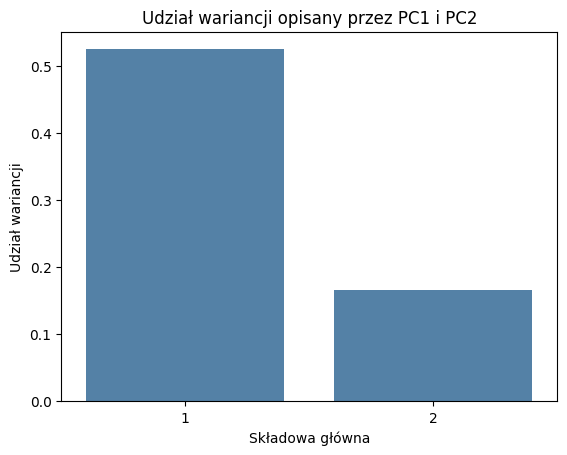

In [6]:
# =============================
# 5. Analiza wariancji opisanej przez PC
# =============================
print('\nOpisywana zmienność: ', pca.explained_variance_ratio_)
sns.barplot(x=np.arange(1, 3), y=pca.explained_variance_ratio_, color='steelblue')
plt.title("Udział wariancji opisany przez PC1 i PC2")
plt.xlabel("Składowa główna")
plt.ylabel("Udział wariancji")
plt.show()

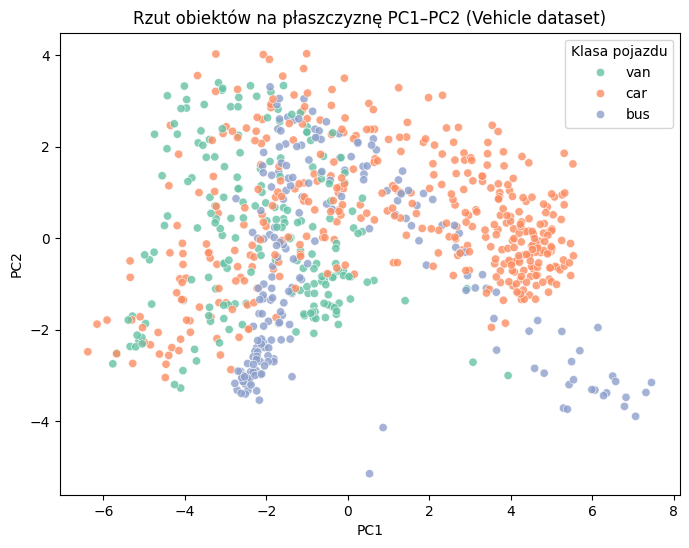

In [7]:
# =============================
# 6. Rzut danych na płaszczyznę PC1/PC2
# =============================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y, palette="Set2", alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Rzut obiektów na płaszczyznę PC1–PC2 (Vehicle dataset)")
plt.legend(title='Klasa pojazdu')
plt.show()

In [8]:
# =============================
# 7. Wagi składowych (loadings)
# =============================
print('\nWagi składowych (pierwsze 2 PC):')
print(np.round(pca.components_[0:2, :], 3))

df_pc = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])


Wagi składowych (pierwsze 2 PC):
[[ 0.274  0.294  0.304  0.269  0.083  0.098  0.317 -0.313  0.314  0.281
   0.309  0.314  0.27  -0.026  0.04   0.063  0.031  0.079]
 [ 0.127 -0.134  0.072  0.176  0.099 -0.03  -0.044 -0.015 -0.057 -0.12
  -0.062 -0.048 -0.21  -0.494  0.056  0.121  0.544  0.539]]


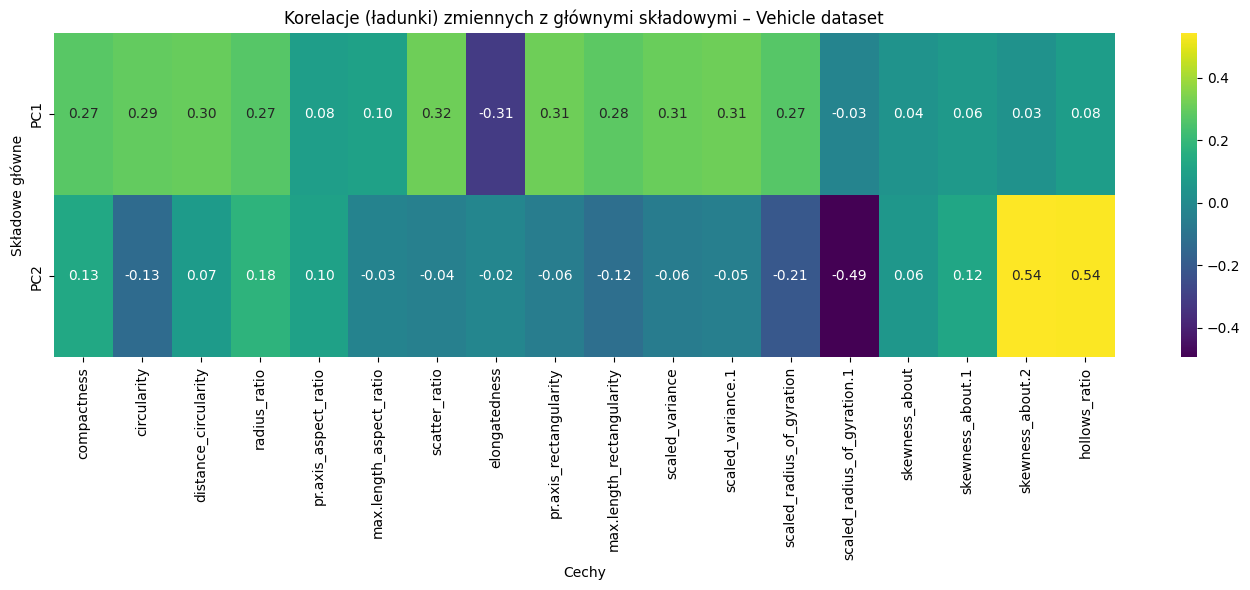

In [9]:
# =============================
# 8. Wizualizacja wag – mapa cieplna
# =============================
plt.figure(figsize=(14, 6))
sns.heatmap(df_pc, cmap='viridis', annot=True, fmt=".2f")
plt.title('Korelacje (ładunki) zmiennych z głównymi składowymi – Vehicle dataset')
plt.xlabel('Cechy')
plt.ylabel('Składowe główne')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# bez autoskalowania
# =============================
# 1.2 Podział na zmienne objaśniające i klasę
# =============================
X2 = df.drop('class', axis=1)
y2 = df['class']

In [11]:
# =============================
# 2.2 PCA (2 pierwsze składowe)
# =============================
pca = PCA(n_components=2)
x2_pca = pca.fit_transform(X2)

print("Kształt danych po skalowaniu:", X2.shape)
print("Kształt danych po PCA:", x2_pca.shape)

Kształt danych po skalowaniu: (813, 18)
Kształt danych po PCA: (813, 2)



Opisywana zmienność:  [0.95860865 0.01804379]


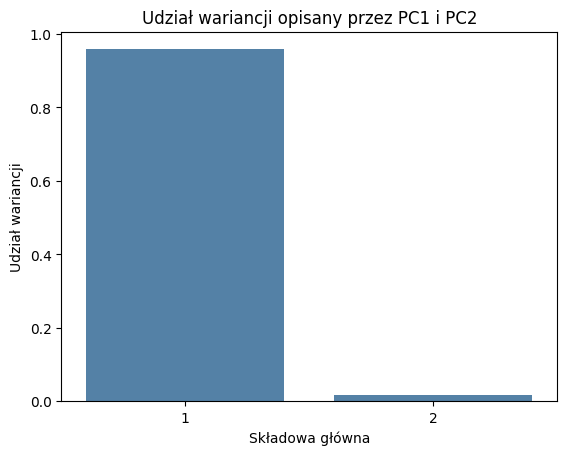

In [12]:
# =============================
# 3.2 Analiza wariancji opisanej przez PC
# =============================
print('\nOpisywana zmienność: ', pca.explained_variance_ratio_)
sns.barplot(x=np.arange(1, 3), y=pca.explained_variance_ratio_, color='steelblue')
plt.title("Udział wariancji opisany przez PC1 i PC2")
plt.xlabel("Składowa główna")
plt.ylabel("Udział wariancji")
plt.show()

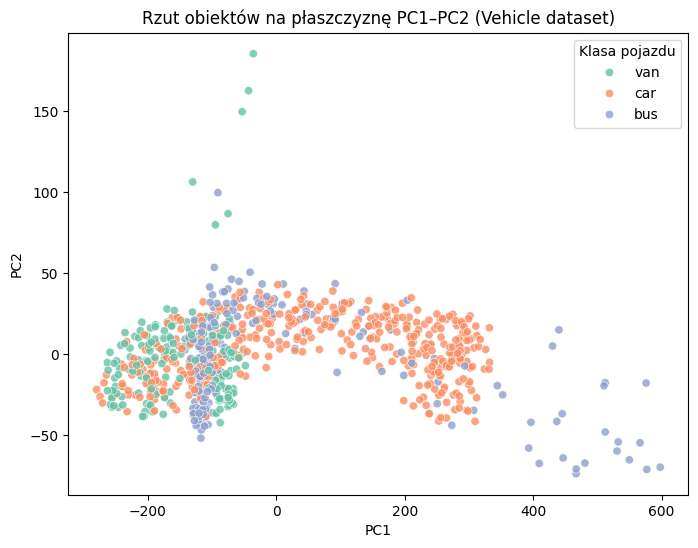

In [13]:
# =============================
# 4.2 Rzut danych na płaszczyznę PC1/PC2
# =============================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x2_pca[:,0], y=x2_pca[:,1], hue=y2, palette="Set2", alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Rzut obiektów na płaszczyznę PC1–PC2 (Vehicle dataset)")
plt.legend(title='Klasa pojazdu')
plt.show()

In [16]:
# =============================
# 5.2 Wagi składowych (loadings)
# =============================
print('\nWagi składowych (pierwsze 2 PC):')
print(np.round(pca.components_[0:2, :], 3))

df_pc2 = pd.DataFrame(pca.components_, columns=X2.columns, index=['PC1', 'PC2'])


Wagi składowych (pierwsze 2 PC):
[[ 0.036  0.028  0.076  0.135  0.005  0.004  0.178 -0.04   0.014  0.063
   0.16   0.944  0.14  -0.001  0.002  0.01   0.001  0.005]
 [ 0.047 -0.029  0.103  0.853  0.249  0.084  0.001 -0.037 -0.003 -0.07
   0.171 -0.122 -0.265 -0.09  -0.009  0.044  0.154  0.187]]


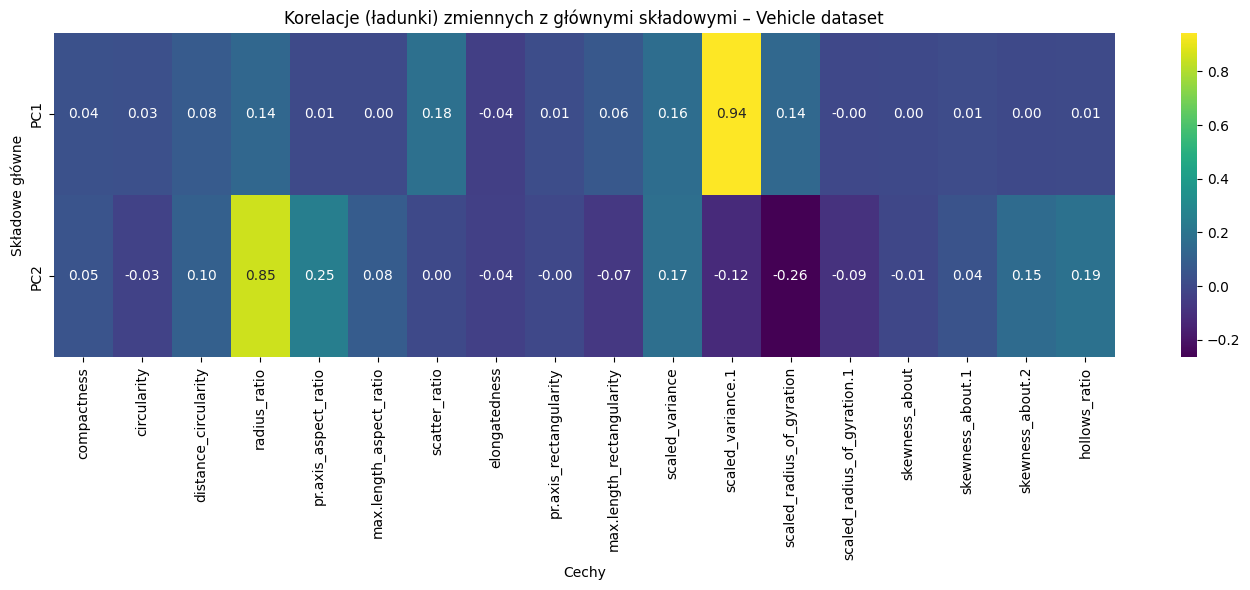

In [17]:
# =============================
# 6.2 Wizualizacja wag – mapa cieplna
# =============================
plt.figure(figsize=(14, 6))
sns.heatmap(df_pc2, cmap='viridis', annot=True, fmt=".2f")
plt.title('Korelacje (ładunki) zmiennych z głównymi składowymi – Vehicle dataset')
plt.xlabel('Cechy')
plt.ylabel('Składowe główne')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
X.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202



Opisywana zmienność:  [0.56667585 0.20606245]


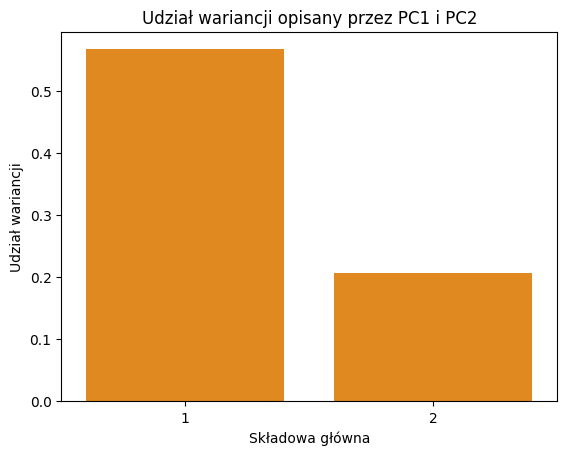

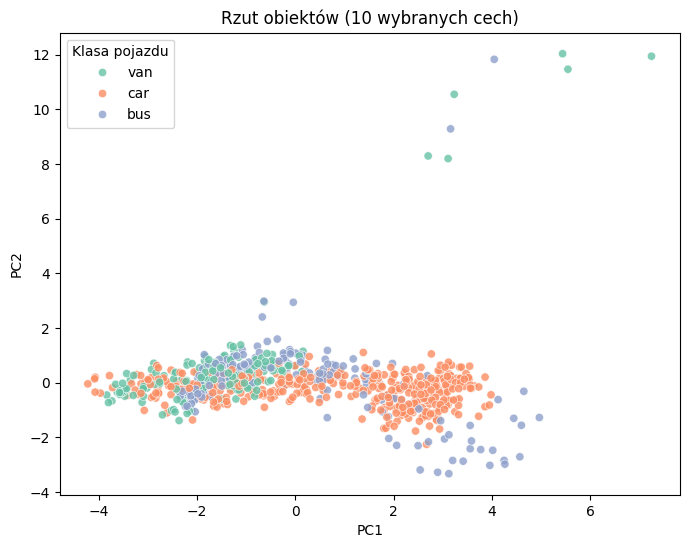

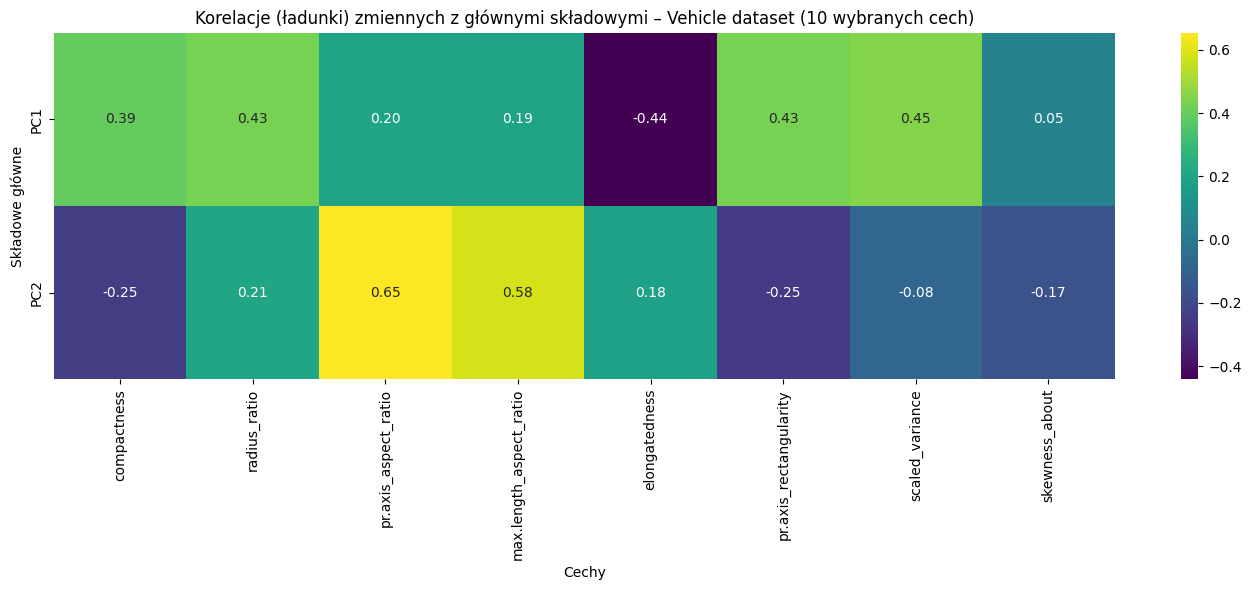

In [22]:
# =============================
# 9. Wersja z ograniczoną liczbą zmiennych
# =============================
# Wybór 10 konkretnych cech do PCA
selected_features = [
    "compactness", "radius_ratio", "pr.axis_aspect_ratio", "max.length_aspect_ratio",
    "elongatedness", "pr.axis_rectangularity", "scaled_variance", "skewness_about"
]

X_selected = X[selected_features]  # tylko wybrane 10 cech
scaled_selected = scaler.fit_transform(X_selected)
pca_selected = PCA(n_components=2)
x_pca_selected = pca_selected.fit_transform(scaled_selected)

# Wariancja i wykresy
print('\nOpisywana zmienność: ', pca_selected.explained_variance_ratio_)

sns.barplot(x=np.arange(1, 3), y=pca_selected.explained_variance_ratio_, color='darkorange')
plt.title("Udział wariancji opisany przez PC1 i PC2")
plt.xlabel("Składowa główna")
plt.ylabel("Udział wariancji")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca_selected[:,0], y=x_pca_selected[:,1], hue=y, palette="Set2", alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Rzut obiektów (10 wybranych cech)")
plt.legend(title='Klasa pojazdu')
plt.show()

# Mapa cieplna wag składowych
df_pc_selected = pd.DataFrame(pca_selected.components_, columns=X_selected.columns, index=['PC1', 'PC2'])

plt.figure(figsize=(14, 6))
sns.heatmap(df_pc_selected, cmap='viridis', annot=True, fmt=".2f")
plt.title('Korelacje (ładunki) zmiennych z głównymi składowymi – Vehicle dataset (10 wybranych cech)')
plt.xlabel('Cechy')
plt.ylabel('Składowe główne')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()